In [1]:
import tensorflow as tf
import numpy as np
from nn_utils import *
import matplotlib.pyplot as plt
import tensorflow.keras as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [2]:
tf.enable_eager_execution()

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

1 Physical GPUs, 1 Logical GPUs


In [4]:
train_set_input,train_set_label,dev_set_input,dev_set_label = load_dataset()

X_train = train_set_input/255
X_dev = dev_set_input/255

Y_train = convert_to_one_hot(train_set_label,3)
Y_dev = convert_to_one_hot(dev_set_label,3)

In [5]:
cnn = Sequential()
cnn.add(Conv2D(filters=32,kernel_size=(3,3),activation=tf.nn.relu,strides=(1,1),padding="same",input_shape=(128, 128, 3)))
cnn.add(MaxPooling2D(pool_size=(8,8),strides=(8,8),padding="same"))
cnn.add(Conv2D(filters=16,kernel_size=(5,5),activation=tf.nn.relu,strides=(1,1),padding="same"))
cnn.add(MaxPooling2D(pool_size=(4,4),strides=(4,4),padding="same"))
cnn.add(Flatten())
cnn.add(Dense(32, activation=tf.nn.relu))
cnn.add(Dense(3, activation=tf.nn.softmax))

In [6]:
adam = K.optimizers.Adam(learning_rate=0.0005, beta_1=0.9, beta_2=0.999, amsgrad=False)

cnn.compile(optimizer=adam,
              loss='categorical_crossentropy',
              metrics=['accuracy',K.metrics.mse])

In [7]:
history = cnn.fit(X_train, Y_train.T, epochs=50,batch_size=8)

W0929 10:22:48.280754 140401946015552 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/50
776/776 [==============================] - 1s 2ms/sample - loss: 1.0997 - acc: 0.3595 - mean_squared_error: 0.2224
Epoch 2/50
776/776 [==============================] - 0s 430us/sample - loss: 1.0390 - acc: 0.4472 - mean_squared_error: 0.2083
Epoch 3/50
776/776 [==============================] - 0s 421us/sample - loss: 0.9921 - acc: 0.4923 - mean_squared_error: 0.1981
Epoch 4/50
776/776 [==============================] - 0s 438us/sample - loss: 0.9695 - acc: 0.5116 - mean_squared_error: 0.1933
Epoch 5/50
776/776 [==============================] - 0s 445us/sample - loss: 0.9319 - acc: 0.5515 - mean_squared_error: 0.1856
Epoch 6/50
776/776 [==============================] - 0s 441us/sample - loss: 0.8916 - acc: 0.5580 - mean_squared_error: 0.1774
Epoch 7/50
776/776 [==============================] - 0s 446us/sample - loss: 0.8534 - acc: 0.6070 - mean_squared_error: 0.1695
Epoch 8/50
776/776 [==============================] - 0s 431us/sample - loss: 0.8111 - acc: 0.6392 - mean_

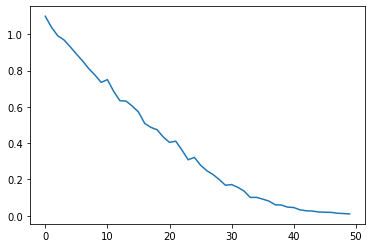

In [8]:
plt.plot(history.history['loss'])

In [9]:
test_loss, test_acc, test_mse = cnn.evaluate(X_dev, Y_dev.T)

print('Test accuracy:', test_acc)
print('Test MSE:', test_mse)

86/86 [==============================] - 0s 2ms/sample - loss: 1.0708 - acc: 0.7093 - mean_squared_error: 0.1369
Test accuracy: 0.7093023
Test MSE: 0.13686502


In [10]:
predictions = cnn.predict(X_dev)

In [11]:
classes = ["copperhead","cottonmouth","watersnake"]

Predicted Classe: cottonmouth
Confidence: 96.97%
Correct classe: watersnake


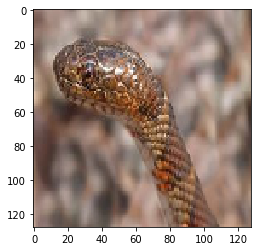

In [54]:
idx = np.random.randint(0,dev_set_input.shape[0])
plt.imshow(dev_set_input[idx])
print("Predicted Classe: {}".format(classes[np.argmax(predictions[idx,:])]))
print("Confidence: {0:.2f}%".format(100*predictions[idx,:].max()))
print("Correct classe: {}".format(classes[np.where(Y_dev[:,idx]==1)[0][0]]))

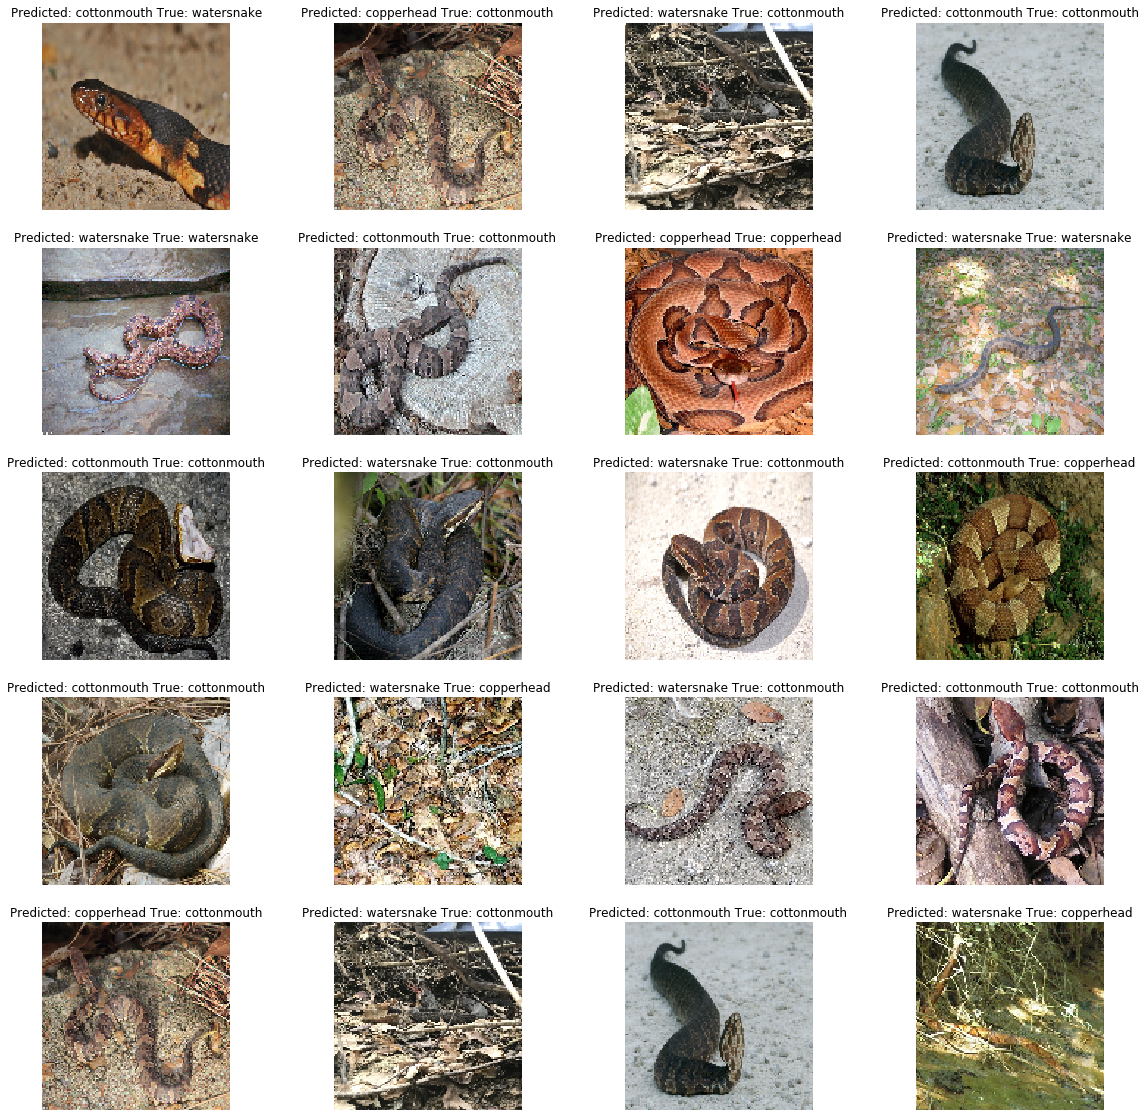

In [23]:
import os
from PIL import Image

test_path = "dataset/test_data/"
directory = os.listdir(test_path)
i = 0
images_test = np.empty([len(directory),128,128,3],dtype='uint8')
images_classes = []
for filename in directory:
    img = Image.open(test_path+filename)
    images_classes.append(filename.split('.')[0].split("_")[0])
    img = Image.Image.resize(img,(128,128)).convert("RGB")
    images_test[i] = np.array(img)
    i+=1

ptest = cnn.predict(images_test)

f,axes = plt.subplots(5,4,figsize=(20,20))
for i in range(5):
    for j in range(4):
        image = images_test[i+4*j,:,:,:]
        text = "Predicted: "+classes[np.argmax(ptest[i+4*j,:])] + " True: " + images_classes[i+4*j]
        axes[i][j].set_title(text)
        axes[i][j].imshow(image)
        axes[i][j].axis("off")